# Hotel Booking Cancellation Prediction
#### - Classification Problem


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('hotel_bookings.csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Business Problem
An Online travel booking company is suffering from loss in revenue because of the uncertain booking cancelation of its customers. The company wants to know which customer will cancel the booking.
As a data-scientist we have to help the company to predict whether the customer will cancel the booking or not.We have all the booking details like arrival_date_year, stays_in_week_nights, arrival_date_day_of_month etc of the customers from various countries.
We have to do some data analysis to answer some questions and we have to work on Machine Learning models to help predict whether the customer will cancel the booking or not.We will focus on Exploratory Data Analysis for answering business questions first and then move on to the prediction approach.

# Dataset Detailes
0   hotel (H1 = Resort Hotel or H2 = City Hotel)

1   is_canceled Value indicating if the booking was canceled (1) or not (0)

2   lead_time Number of days to go between the entering date of the booking into the PMS and the arrival date

3   arrival_date_year Year of arrival date

4   arrival_date_month Month of arrival date

5   arrival_date_week_number Week number of year for arrival date

6   arrival_date_day_of_month Day of arrival date

7   stays_in_weekend_nights Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
8   stays_in_week_nights Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

9   adults Number of adults

10  children Number of children

11  babies Number of babies

12  meal Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal

13  country Country of origin. Categories are represented in the ISO 3155–3:2013 format

14  market_segment Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

15  distribution_channel Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16  is_repeated_guest Value indicating if the booking name was from a repeated guest (1) or not (0)

17  previous_cancellations Number of previous bookings that were cancelled by the customer prior to the current booking

18  previous_bookings_not_canceled Number of previous bookings not cancelled by the customer prior to the current booking

19  reserved_room_type Code of room type reserved. Code is presented instead of designation for anonymity reasons.

20  assigned_room_typeCode for the type of room assigned to the booking.Code is presented instead of designation for anonymity reasons.

21  booking_changes Number of changes made to the booking from the moment the booking was entered on the PMS until the moment of check-in or out

22  deposit_type Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No

23  agent ID of the travel agency that made the booking

24  company ID of the company that made the booking or responsible for paying the booking.

25  days_in_waiting_list Number of days the booking was in the waiting list before it was confirmed to the customer

26  customer_type Type of booking, assuming one of four categories:Transient - Transient-Party - Contract - Group

27  adr Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

28  required_car_parking_spaces Number of car parking spaces required by the customer

29  total_of_special_requestsNumber of special requests made by the customer (e.g. twin bed or high floor)

30  reservation_status Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out

31  reservation_status_date Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Some features have wrong datatype asn we need to fix it

In [5]:
# checking for missing values
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#### The following columns previous_cancellations, previous_bookings_not_canceled, booking_changes days_in_waiting_list, required_car_parking_spaces, total_of_special_requests have only a maximum value. This shows that these features contribute to the decision of cancellation only in very few cases.

### Assumptions about impact of features:

High: hotel, lead_time, arrival_date_year, arrival_date_month, stays_in_weekend_nights, stays_in_week_nights, is_repeated_guest, previous_cancellations, previous_bookings_not_canceled, reserved_room_type, assigned_room_type, deposit_type, days_in_waiting_list, customer_type


Medium: children, babies, distribution_channel, booking_changes, adr


Low: arrival_date_week_number, arrival_date_day_of_month,country, meal, adults, market_segment, agent, company, required_car_parking_spaces, total_of_special_requests, reservation_status, reservation_status_date

##### For the following step, I will drop the NaN values by dropping the columns or the rows.

In [7]:
#checking for percentage of null values
np.sum(data.isnull())*100 / (data.shape[0])

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

###### Mising values:

country

agent

company

children


#### we will drop company column and agent column


##### Data types:

Categorical - hotel, is_canceled, customer_type, is_repeated_guest, meal, country, market_segment, distribution_channel, reserved_room_type, assigned_room_type, deposit_type, agent, company, reservation_status

Numerical - lead_time, stays_in_weekend_nights, stays_in_week_nights, adults, children, babies, previous_cancellations, booking_changes, previous_bookings_not_canceled, days_in_waiting_list, adr, required_car_parking_spaces, total_of_special_requests

Ordinal - arrival_date_year, arrival_date_month, arrival_date_week_number, arrival_date_day_of_month, reservation_status_date

In [8]:

data.drop(columns=['company','agent'],inplace=True)
# agent is the ID from which the boooking is made--->delete it


In [9]:
data.shape

(119390, 30)

In [10]:
data.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

In [11]:
### Filling null values with 0 for children and .
### filling rows corresponding to missing vlaues for country with mode
 
data.children.fillna(0,inplace=True)
data['country'].fillna(data['country'].mode()[0], inplace=True)

In [12]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
#corr(df['agent'],df['is_cancled'])
data.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005515,0.010395,-0.030131,0.035501,-0.020904,0.005508,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,0.005036,-0.037613,0.054636,0.005515,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889


In [14]:
data.duplicated().sum()

32039

In [15]:
data.drop_duplicates(inplace=True)

In [16]:
## calculating total guest for each record
data['Total_guest']=data['adults']+data['children']+data['babies']
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2.0


In [17]:
data.shape

(87351, 31)

In [18]:
### dropping those rows where total guests are 0 and making a dataframe as df
df = data[data.Total_guest != 0]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_guest
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06,2.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07,3.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07,2.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07,2.0


In [19]:
df['is_canceled'].value_counts()

0    63181
1    24004
Name: is_canceled, dtype: int64

In [20]:
df['Total_stay_days']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df.Total_stay_days.value_counts()

3     17822
1     17145
2     15729
4     13558
7      7519
5      6726
6      3263
10     1072
8      1062
14      859
9       779
0       591
11      367
12      196
13      133
15       69
21       55
28       34
16       33
18       24
19       22
17       20
20       14
25       14
29       13
30       13
22       12
24        6
26        6
23        5
35        5
27        4
42        4
56        2
33        2
60        1
69        1
45        1
38        1
46        1
48        1
34        1
Name: Total_stay_days, dtype: int64

In [21]:
#drop stays_in_weekend_nights and stays_in_week_nights coulmns as we created a column named total_stay_days
df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'],inplace=True)

In [22]:
#is_canceled & reservation_status provide same information, we can drop reservation_status for model building purpose
#df.drop(columns=['agent', 'company', 'reservation_status'],inplace=True)
#df.drop(columns=['agent', 'reservation_status'],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87185 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87185 non-null  object 
 1   is_canceled                     87185 non-null  int64  
 2   lead_time                       87185 non-null  int64  
 3   arrival_date_year               87185 non-null  int64  
 4   arrival_date_month              87185 non-null  object 
 5   arrival_date_week_number        87185 non-null  int64  
 6   arrival_date_day_of_month       87185 non-null  int64  
 7   adults                          87185 non-null  int64  
 8   children                        87185 non-null  float64
 9   babies                          87185 non-null  int64  
 10  meal                            87185 non-null  object 
 11  country                         87185 non-null  object 
 12  market_segment                 

In [23]:
#Assumptions about cancellation:

# The type of hotel decides the cancelation rate with higher cancellations in city hotels as compared to resort hotels due to variety of facilities available in resort hotels.
# The earlier the booking made, higher the chances of cancellation.
# Customers who have bookings for longer durations have lesser chance of cancelling their booking.
# As more children or babies are involved in the booking, higher chances of cancellation.
# Old guest (is_repeated_guest=1) is less likely to cancel current booking.
# If there are high previous cancellations, possibility of cancellation of current booking is also high.
# If room assigned is not the same as reserved room type, customer might positively cancel the booking.
# Higher the number of changes made to the booking, lesser is the chance of cancellation due to the investment of time in curating the booking as per one's requirement.
# Bookings that are refundable or for which deposits were not made at the time of booking stand a high chance of cancelation.
# If the number of days in waiting list is significant, customer might make some other booking due to uncertainty of confirmation of current booking.


### TARGET VARIABLE- is calceled


# Exploratory Data Analysis

#### In this part, I would like to visualize some features and show statistical relationship with target variable. This analysis will help to get overall view and deep familiarity of the data, detect extreme values and identify obvious errors

## HISTOGRAM

#### A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis gives information about frequency.# 

<IPython.core.display.Javascript object>

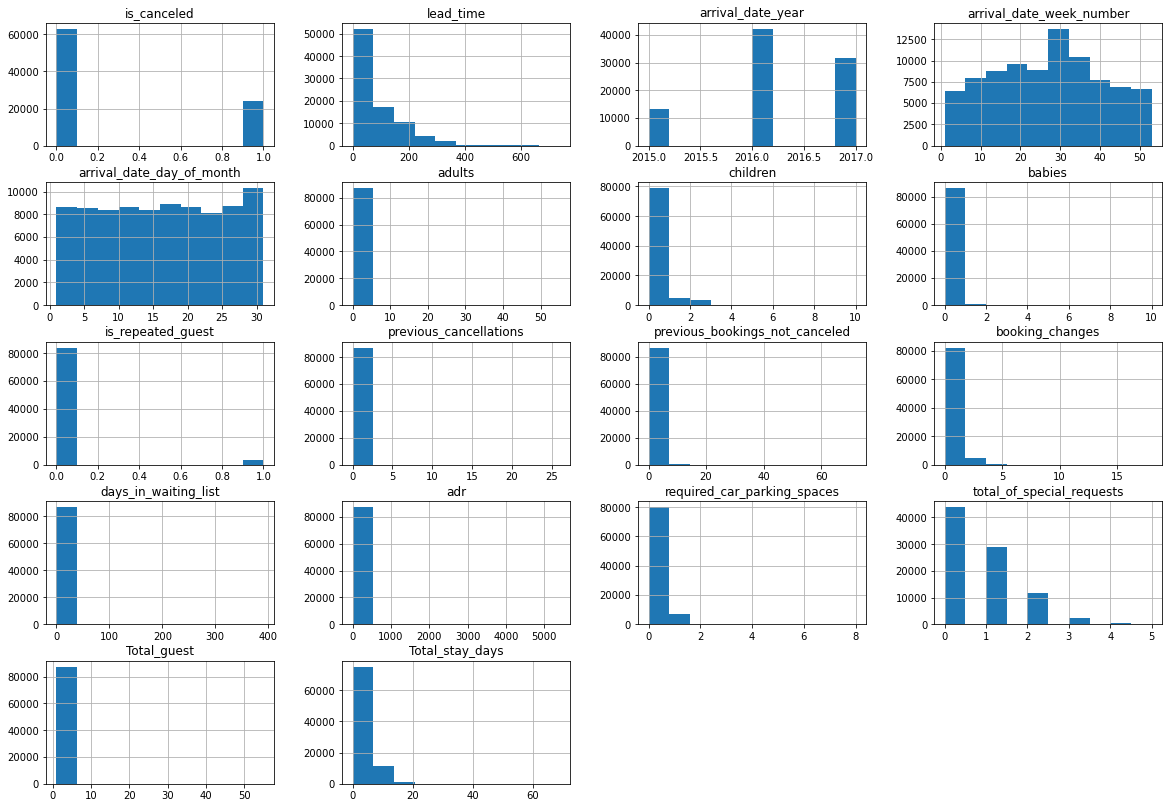

In [24]:
df.hist(figsize=(20,14))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

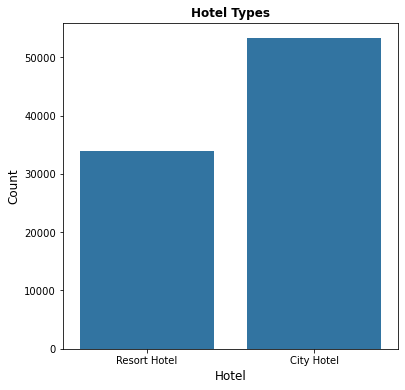

In [25]:
# Hotel types details
base_color= sns.color_palette()[0]
plt.figure(figsize=(6,6))
sns.countplot(x='hotel', data = df,color=base_color)
plt.title('Hotel Types', weight='bold')
plt.xlabel('Hotel', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

### First graph is about exploring hotel feature which denotes type of the hotels. According to the above graph, approximately 34% of the data was booked for resort hotel and the rest of was booked for City Hotel.

<IPython.core.display.Javascript object>

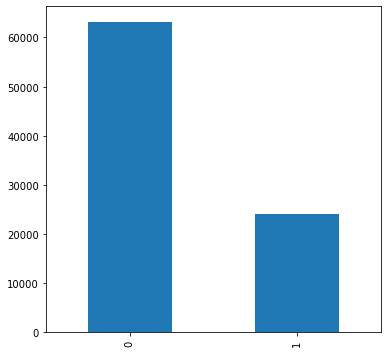

In [26]:
plt.figure(figsize=(6,6))
df['is_canceled'].value_counts().plot(kind='bar');

In [27]:
#cancellation of booking in resort
resort_canceled=df[(df['hotel']=='Resort Hotel')&(df['is_canceled']==1)]
print('cancelations of booking in Resort Hotels',(len(resort_canceled))/(len(df[df['hotel']=='Resort Hotel'])))


cancelations of booking in Resort Hotels 0.23495946941783347


In [28]:
#cancelations of booking in City Hotel
city_canceled=df[(df['hotel']=='City Hotel')& (df['is_canceled']==1)]
print('cancelations of booking in City Hotels',(len(city_canceled))/(len(df[df['hotel']=='City Hotel'])))

cancelations of booking in City Hotels 0.3010326699211416


### Cancelations of booking in resort hotels 0.27982821775925226
### Cancelations of booking in City Hotels 0.41776693999772574

Our 1st assumption, city hotels have higher cancelation rate than resort hotels, is valid.

<IPython.core.display.Javascript object>

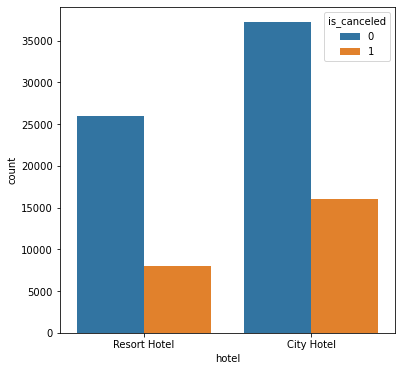

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='hotel', hue='is_canceled');


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x720 with 0 Axes>

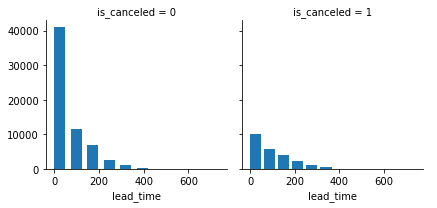

In [30]:
plt.figure(figsize=(10,10))
grid = sns.FacetGrid(df, col='is_canceled')
grid.map(plt.hist, 'lead_time', width=50)
grid.add_legend()
plt.show()

#### Maximum cancelations occur if the booking is made 60-70 days before the checkin date. Longer the lead_time, lower is the cancelation. This invalidates our 2nd assumption.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

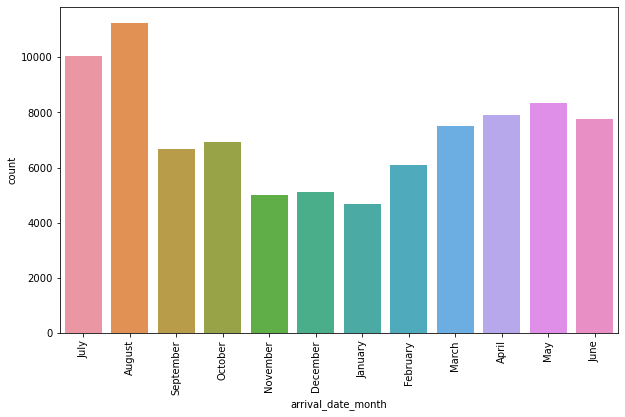

In [31]:
#arrival date
plt.figure(figsize=(10,6))
sns.countplot(x='arrival_date_month',data=data)
plt.xticks(rotation='vertical')
plt.show()

### The above graph is showing the number of bookings for each month. According to that, August is the busiest month and January is the most unoccupied month. It is half as busy as August.

In [32]:
a=df[(df['Total_stay_days']==0)]
a['is_canceled'].value_counts()
### no of stays is 0 when booking is not cancelled. this could be an error as it is not possible

0    568
1     23
Name: is_canceled, dtype: int64

In [33]:
#print the cases where there is no children
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100

10.438722257269026

<IPython.core.display.Javascript object>

Cancelations among new guests=  0.2832703021915749
Cancelations among old guests=  0.07728894173602854


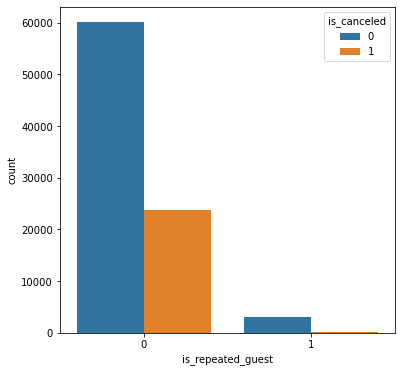

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_canceled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_canceled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

As seen in the correlation table, the above graph bolsters the evidence that maximum customers are new comers and they are less likely to cancel their current booking. Old guests are less likely to cancel the booking (14%). Assumption 5 holds true.

<IPython.core.display.Javascript object>

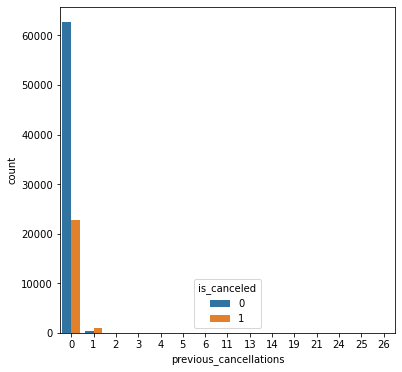

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled');

Maximum customers have 0 previous cancellations. They are less likely to cancel the current booking. However, customers who have cancelled once earlier are more likely to cancel the current booking. This also matches with the positive correlation between previous_cancellations and is_cancelled and supports Assumption 6.

In [36]:
temp = df.loc[df['reserved_room_type']!=df['assigned_room_type']]
temp['is_canceled'].value_counts(normalize=True)*100

0    95.253506
1     4.746494
Name: is_canceled, dtype: float64

 Assumption 7 that there more cancellations when assigned room type is different from reserved room type is not valid. There are only 5% cancellations in such a case.

<AxesSubplot:xlabel='booking_changes', ylabel='is_canceled'>

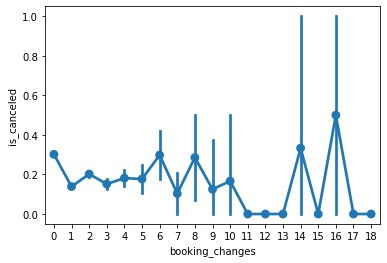

In [37]:
sns.pointplot(data=df, x='booking_changes', y='is_canceled')

 Assumption 8 about the bookings does not hold as there is no trend in it's impact on the cancellation of bookings.

In [38]:
df.deposit_type.value_counts()

No Deposit    86040
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

<IPython.core.display.Javascript object>

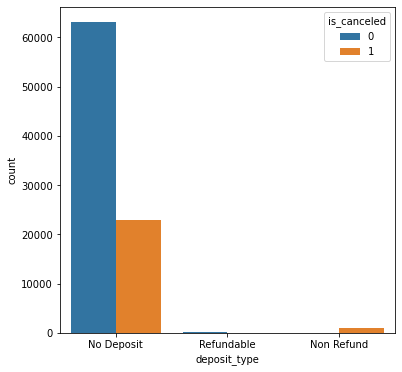

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x="deposit_type", hue="is_canceled",data=df);

Contrary to assumption 9, bookings that are non_refundable are canceled

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_date_year', ylabel='count'>

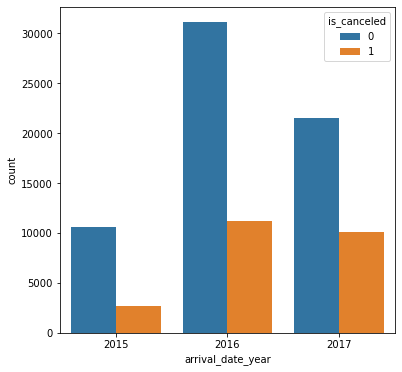

In [40]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='arrival_date_year', hue='is_canceled')

<IPython.core.display.Javascript object>

<Figure size 720x432 with 0 Axes>

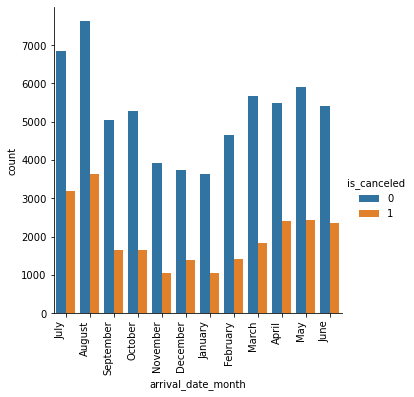

In [41]:
plt.figure(figsize=(10,6))
chart = sns.catplot(data=df, x='arrival_date_month', hue='is_canceled', kind='count')
chart.set_xticklabels(rotation=90, horizontalalignment='right')

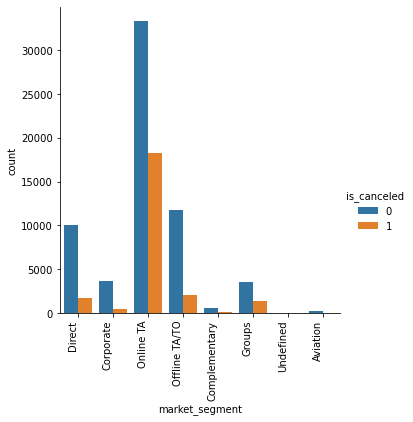

In [42]:
chart = sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled');
chart.set_xticklabels(rotation=90, horizontalalignment='right')

Online TA gives the most bookings as weel as most cancelations among all market segment

<IPython.core.display.Javascript object>

Transient          82.386878
Transient-Party    13.396800
Contract            3.595802
Group               0.620520
Name: customer_type, dtype: float64


<AxesSubplot:xlabel='customer_type', ylabel='count'>

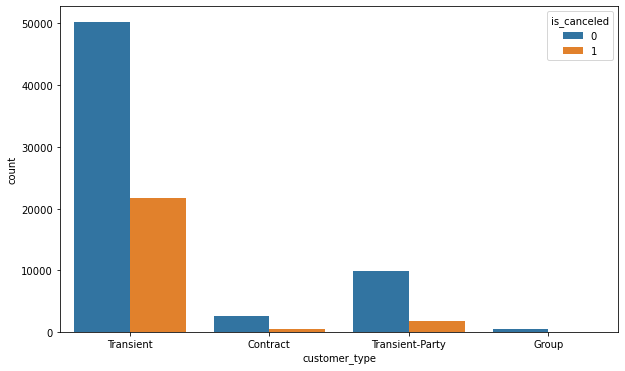

In [43]:
plt.figure(figsize=(10,6))
print(df['customer_type'].value_counts(normalize=True)*100)
sns.countplot(data=df, x='customer_type', hue='is_canceled')

 75% bookings occur in Transient category of customers. It also sees the highest cancellation among all the categories.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

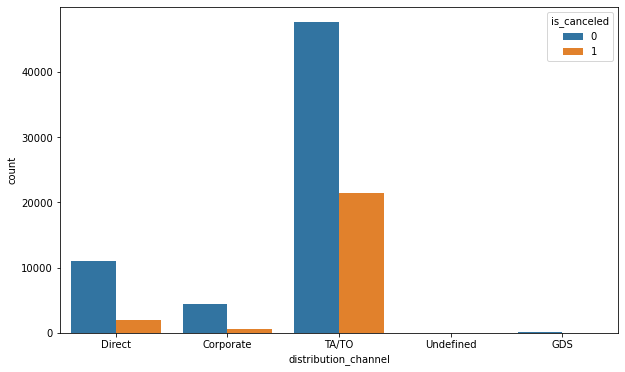

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

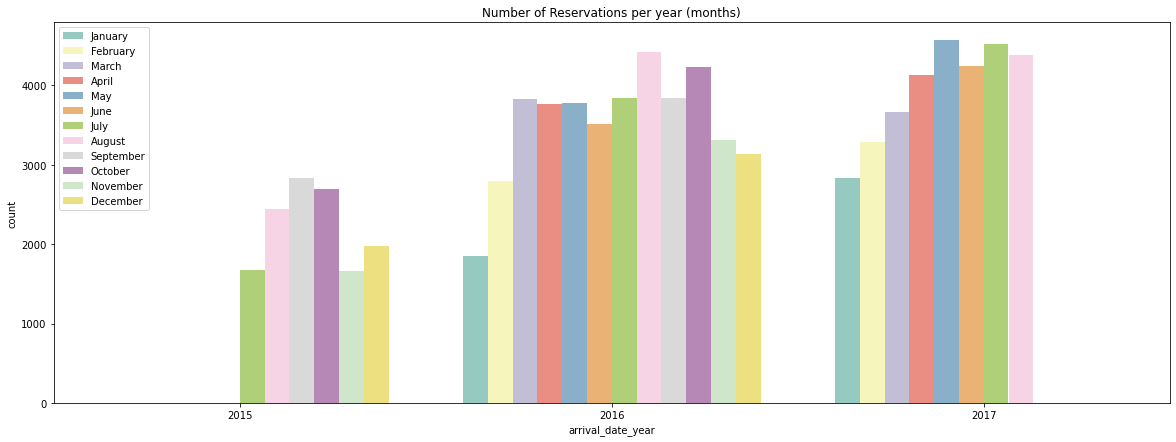

In [45]:
# parameters
plt.rcParams['figure.figsize'] = [20, 7]
#sns.set(style = 'white', font_scale = 1.25)

# plot
arrival = sns.countplot(df['arrival_date_year'], hue = 'arrival_date_month', data = df, palette = 'Set3',
             hue_order = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December'])
arrival.set(title = "Number of Reservations per year (months)")
plt.legend(loc='upper left');

<IPython.core.display.Javascript object>

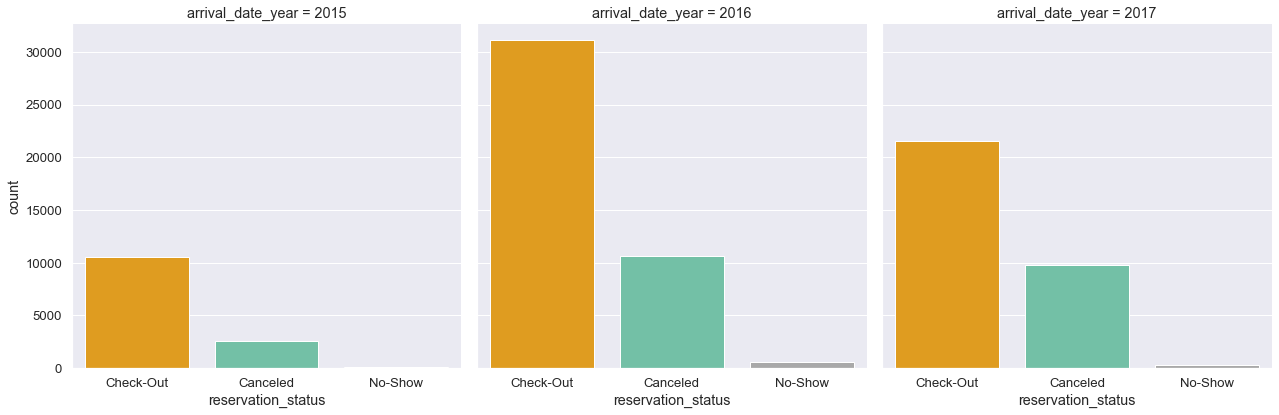

In [46]:
# Parameters
plt.rcParams['figure.figsize'] = [15, 7]
sns.set(style = 'darkgrid', font_scale = 1.2)

# catplot (countplot)
cat = sns.catplot(x = 'reservation_status', col = 'arrival_date_year', kind = 'count', data = df,
            height = 6, palette = ['orange', 'mediumaquamarine', 'darkgrey'])

# Feature Engineering

#### We need to encode the categorical Variables

For that we can either use Label encoder/Map values or One hot encoder/dummies
If the categorical variable is ordinal use Label Encoder else use One hot encoder

In [47]:
#deleting the reservation status columns as it is similar to is_calceled column 
# also no need for reservation_status_date
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

In [48]:
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

df['change_in_room'] = df.apply(roomChange, axis=1)

In [49]:
df.drop(columns=['assigned_room_type','reserved_room_type'],inplace=True)


In [50]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,change_in_room
0,Resort Hotel,0,342,2015,July,27,1,2,0.0,0,...,3,No Deposit,0,Transient,0.0,0,0,2.0,0,False
1,Resort Hotel,0,737,2015,July,27,1,2,0.0,0,...,4,No Deposit,0,Transient,0.0,0,0,2.0,0,False
2,Resort Hotel,0,7,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,1.0,1,True
3,Resort Hotel,0,13,2015,July,27,1,1,0.0,0,...,0,No Deposit,0,Transient,75.0,0,0,1.0,1,False
4,Resort Hotel,0,14,2015,July,27,1,2,0.0,0,...,0,No Deposit,0,Transient,98.0,0,1,2.0,2,False


In [51]:
# normalizing numerical variables

df['lead_time'] = np.log(df['lead_time'] + 1)
df['arrival_date_week_number'] = np.log(df['arrival_date_week_number'] + 1)
df['arrival_date_day_of_month'] = np.log(df['arrival_date_day_of_month'] + 1)
#num_df['agent'] = np.log(num_df['agent'] + 1)
#num_df['company'] = np.log(num_df['company'] + 1)
df['adr'] = np.log(df['adr'] + 1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,change_in_room
0,Resort Hotel,0,5.837730,2015,July,3.332205,0.693147,2,0.0,0,...,3,No Deposit,0,Transient,0.000000,0,0,2.0,0,False
1,Resort Hotel,0,6.603944,2015,July,3.332205,0.693147,2,0.0,0,...,4,No Deposit,0,Transient,0.000000,0,0,2.0,0,False
2,Resort Hotel,0,2.079442,2015,July,3.332205,0.693147,1,0.0,0,...,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,True
3,Resort Hotel,0,2.639057,2015,July,3.332205,0.693147,1,0.0,0,...,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,False
4,Resort Hotel,0,2.708050,2015,July,3.332205,0.693147,2,0.0,0,...,0,No Deposit,0,Transient,4.595120,0,1,2.0,2,False


In [52]:
### handling arrival_date_year
df['arrival_date_year']=df['arrival_date_year'].astype(str)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87185 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87185 non-null  object 
 1   is_canceled                     87185 non-null  int64  
 2   lead_time                       87185 non-null  float64
 3   arrival_date_year               87185 non-null  object 
 4   arrival_date_month              87185 non-null  object 
 5   arrival_date_week_number        87185 non-null  float64
 6   arrival_date_day_of_month       87185 non-null  float64
 7   adults                          87185 non-null  int64  
 8   children                        87185 non-null  float64
 9   babies                          87185 non-null  int64  
 10  meal                            87185 non-null  object 
 11  country                         87185 non-null  object 
 12  market_segment                 

In [54]:
dummy=pd.get_dummies(df[['hotel','arrival_date_month','arrival_date_year','meal', 'market_segment', 'distribution_channel','deposit_type','customer_type','change_in_room']],drop_first=True)
pd.set_option('display.max_columns',None)
dummy.head()

,change_in_room,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_year_2016,arrival_date_year_2017,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [55]:
# month_map = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
# df.arrival_date_month = df.arrival_date_month.map(month_map).astype(float)
#df[df['arrival_date_month']==NaN]

In [56]:
#df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87185 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87185 non-null  object 
 1   is_canceled                     87185 non-null  int64  
 2   lead_time                       87185 non-null  float64
 3   arrival_date_year               87185 non-null  object 
 4   arrival_date_month              87185 non-null  object 
 5   arrival_date_week_number        87185 non-null  float64
 6   arrival_date_day_of_month       87185 non-null  float64
 7   adults                          87185 non-null  int64  
 8   children                        87185 non-null  float64
 9   babies                          87185 non-null  int64  
 10  meal                            87185 non-null  object 
 11  country                         87185 non-null  object 
 12  market_segment                 

In [235]:
#df['arrival_date'] = df['arrival_date_year'].astype(str)+'-'+df['arrival_date_month'].astype(str)+'-'+df['arrival_date_day_of_month'].astype(str)

In [236]:
#df['children'] = df['children'].fillna(0)
#df['offspring'] = (df['children'] + df['babies']).astype(int)

In [237]:
#df['total_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']

In [238]:
#make a list of most frequent categories of country
top_15=[x for x in df['country'].value_counts().sort_values(ascending=False).head(15).index]
top_15

['PRT',
 'GBR',
 'FRA',
 'ESP',
 'DEU',
 'ITA',
 'IRL',
 'BEL',
 'BRA',
 'NLD',
 'USA',
 'CHE',
 'CN',
 'AUT',
 'SWE']

In [239]:
#now make 10 binary variables
for label in top_15:
    df[label]=np.where(df['country']==label,1,0)
    
df.head(50)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,change_in_room,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE
0,Resort Hotel,0,5.837730,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.000000,0,0,2.0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Resort Hotel,0,6.603944,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.000000,0,0,2.0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Resort Hotel,0,2.079442,2015,July,3.332205,0.693147,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Resort Hotel,0,2.639057,2015,July,3.332205,0.693147,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Resort Hotel,0,2.708050,2015,July,3.332205,0.693147,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,4.595120,0,1,2.0,2,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Resort Hotel,0,0.000000,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,4.682131,0,0,2.0,2,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Resort Hotel,0,2.302585,2015,July,3.332205,0.693147,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,0,No Deposit,0,Transient,4.644391,0,1,2.0,2,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Resort Hotel,1,4.454347,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,4.418841,0,1,2.0,3,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Resort Hotel,1,4.330733,2015,July,3.332205,0.693147,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0,Transient,4.668145,0,0,2.0,3,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Resort Hotel,1,3.178054,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,4.820282,0,0,2.0,4,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [243]:
df=pd.concat([df,dummy],axis='columns')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,change_in_room,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE,change_in_room,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_year_2016,arrival_date_year_2017,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,Resort Hotel,0,5.837730,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,3,No Deposit,0,Transient,0.000000,0,0,2.0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,Resort Hotel,0,6.603944,2015,July,3.332205,0.693147,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,4,No Deposit,0,Transient,0.000000,0,0,2.0,0,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,Resort Hotel,0,2.079442,2015,July,3.332205,0.693147,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,True,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,True,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,Resort Hotel,0,2.639057,2015,July,3.332205,0.693147,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,0,No Deposit,0,Transient,4.330733,0,0,1.0,1,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Resort Hotel,0,2.708050,2015,July,3.332205,0.693147,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,0,No Deposit,0,Transient,4.595120,0,1,2.0,2,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [244]:
df.shape

(87185, 77)

In [245]:
df.drop(columns=['hotel','country','arrival_date_year','arrival_date_month','change_in_room','arrival_date_week_number','meal','market_segment','distribution_channel','distribution_channel','deposit_type','customer_type'],inplace=True)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87185 entries, 0 to 119389
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87185 non-null  int64  
 1   lead_time                       87185 non-null  float64
 2   arrival_date_day_of_month       87185 non-null  float64
 3   adults                          87185 non-null  int64  
 4   children                        87185 non-null  float64
 5   babies                          87185 non-null  int64  
 6   is_repeated_guest               87185 non-null  int64  
 7   previous_cancellations          87185 non-null  int64  
 8   previous_bookings_not_canceled  87185 non-null  int64  
 9   booking_changes                 87185 non-null  int64  
 10  days_in_waiting_list            87185 non-null  int64  
 11  adr                             87184 non-null  float64
 12  required_car_parking_spaces    

In [247]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_year_2016,arrival_date_year_2017,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,5.837730,0.693147,2,0.0,0,0,0,0,3,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,6.603944,0.693147,2,0.0,0,0,0,0,4,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,2.079442,0.693147,1,0.0,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,2.639057,0.693147,1,0.0,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.708050,0.693147,2,0.0,0,0,0,0,0,0,4.595120,0,1,2.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [248]:
df.drop(columns=['adults','children','children'],inplace=True)
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_year_2016,arrival_date_year_2017,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,5.837730,0.693147,0,0,0,0,3,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,6.603944,0.693147,0,0,0,0,4,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0,2.079442,0.693147,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,2.639057,0.693147,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,2.708050,0.693147,0,0,0,0,0,0,4.595120,0,1,2.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [249]:
df.shape

(87185, 63)

# Model building


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
y=df.is_canceled
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 87185, dtype: int64

In [260]:
x=df.drop(columns=['is_canceled'])
x

,lead_time,arrival_date_day_of_month,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_guest,Total_stay_days,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE,hotel_Resort Hotel,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,arrival_date_year_2016,arrival_date_year_2017,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,5.837730,0.693147,0,0,0,0,3,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,6.603944,0.693147,0,0,0,0,4,0,0.000000,0,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,2.079442,0.693147,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
3,2.639057,0.693147,0,0,0,0,0,0,4.330733,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2.708050,0.693147,0,0,0,0,0,0,4.595120,0,1,2.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,3.178054,3.433987,0,0,0,0,0,0,4.576153,0,0,2.0,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
119386,4.634729,3.465736,0,0,0,0,0,0,5.422436,0,2,3.0,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
119387,3.555348,3.465736,0,0,0,0,0,0,5.067079,0,4,2.0,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
119388,4.700480,3.465736,0,0,0,0,0,0,4.657763,0,0,2.0,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0


In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape

(61029, 62)

In [262]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.7999967228694556

In [265]:
x_test.fillna(x_train.mean(), inplace=True)
lg.score(x_test,y_test)

0.7971402355100168

In [ ]:
ytest1=rf.predict(x_test)
print(classification_report(y_test,ytest1))

# KNN

In [267]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)

0.8617870192859133

In [268]:
knn.score(x_test,y_test)

0.7909848600703472

# Naive Bayes

In [273]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [276]:
naive_by=GaussianNB()
naive_by.fit(x_train,y_train)
naive_by.score(x_train,y_train)

0.597584754788707

In [277]:
naive_by.score(x_test,y_test)

0.6014681143905796

# Decison Tree

In [286]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
clf.score(x_train,y_train)

0.9974766094807387

In [287]:
clf.score(x_test,y_test)

0.7784064841718917

# Random Forest Classifier

In [280]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8378574705612479

In [281]:
rf.score(x_train,y_train)

0.9974602238280161

In [283]:
from sklearn.metrics import classification_report 
ytest1=rf.predict(x_test)
print(classification_report(y_test,ytest1))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     18905
           1       0.75      0.62      0.68      7251

    accuracy                           0.84     26156
   macro avg       0.81      0.77      0.79     26156
weighted avg       0.83      0.84      0.83     26156



In [284]:
confusion_matrix(y_test,ytest1)

array([[17439,  1466],
       [ 2775,  4476]], dtype=int64)